In [6]:
import sys
import os
import glob
import pandas as pd
import numpy as np
import json
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table
from matplotlib import pyplot as plt
from nilearn.masking import apply_mask
sys.path.append('..')
from utils.data import load_participant_list, get_betamap_paths

# Parameters

In [26]:
run = 'test'
#first_level_dir = '/home/ubuntu/data/learning-habits/bids_dataset/derivatives/nilearn/no_modulation_20250123'
first_level_dir = '/home/ubuntu/data/learning-habits/bids_dataset/derivatives/nilearn/both_modulators_exclude_mask_20250206'

# Load First level data

In [27]:
base_dir = '/home/ubuntu/data/learning-habits'
sub_ids = load_participant_list(base_dir)

In [28]:
first_level_params = json.load(open(os.path.join(first_level_dir, 'sub-01', f'run-{run}', f'sub-01_run-{run}_params.json')))
for key, value in first_level_params.items():
    print(f"{key}: {value}")

model_name: both_modulators_exclude_mask
tr: 2.33384
hrf_model: spm
noise_model: ar1
smoothing_fwhm: 5
high_pass: 0.01
motion_type: basic
fd_thresh: 0.5
std_dvars_thresh: 2
scrub: dummies
modulators: both
exclude_stimuli: True
include_physio: True
brain_mask: True
modulator_normalization: zscore
exclusion_threshold: 0.2


# Second level - Button press

In [29]:
betamap_response_paths, matched_sub_ids =  get_betamap_paths(sub_ids, first_level_dir, run, "sub-{sub_id}_run-{run}_betamap_response.nii.gz")

In [30]:
betamaps_response_imgs = [image.load_img(path) for path in betamap_response_paths]

In [31]:
X_response = pd.DataFrame([1] * len(betamaps_response_imgs), columns=['Intercept'])

In [32]:
model = SecondLevelModel().fit(betamaps_response_imgs, design_matrix=X_response)

In [33]:
response_map = model.compute_contrast(output_type='z_score')

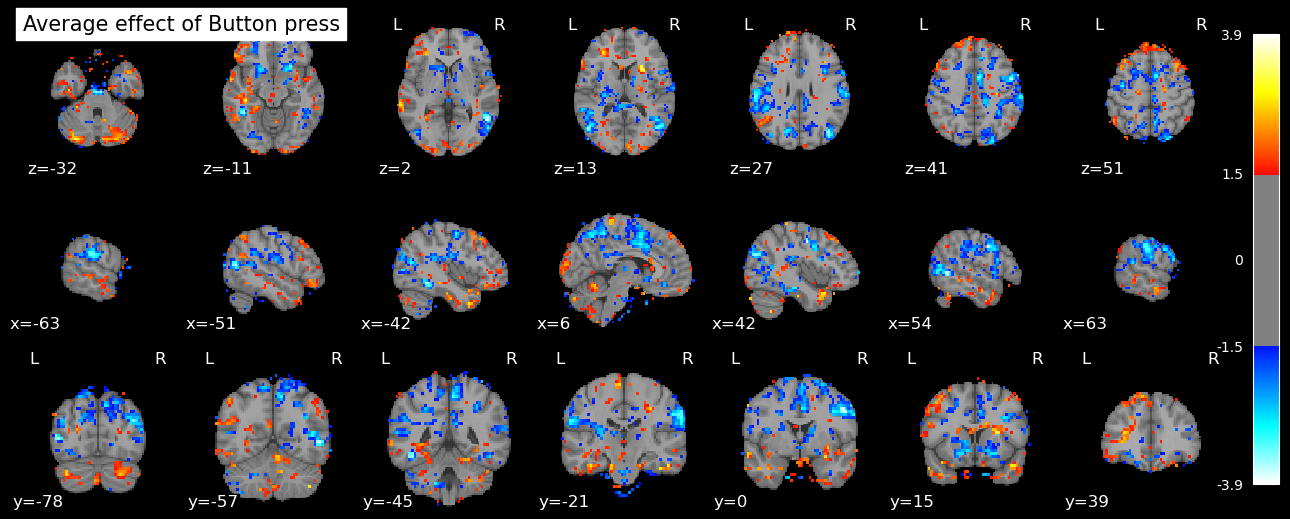

In [34]:
plot_stat_map(response_map, threshold=1.5, black_bg=True, display_mode='mosaic', title='Average effect of Button press')

In [35]:
thresholded_zmap, threshold = threshold_stats_img(response_map, alpha=0.05, height_control='fpr')#, cluster_threshold=5)
print(f"Threshold: {threshold:.3f}")

Threshold: 1.960


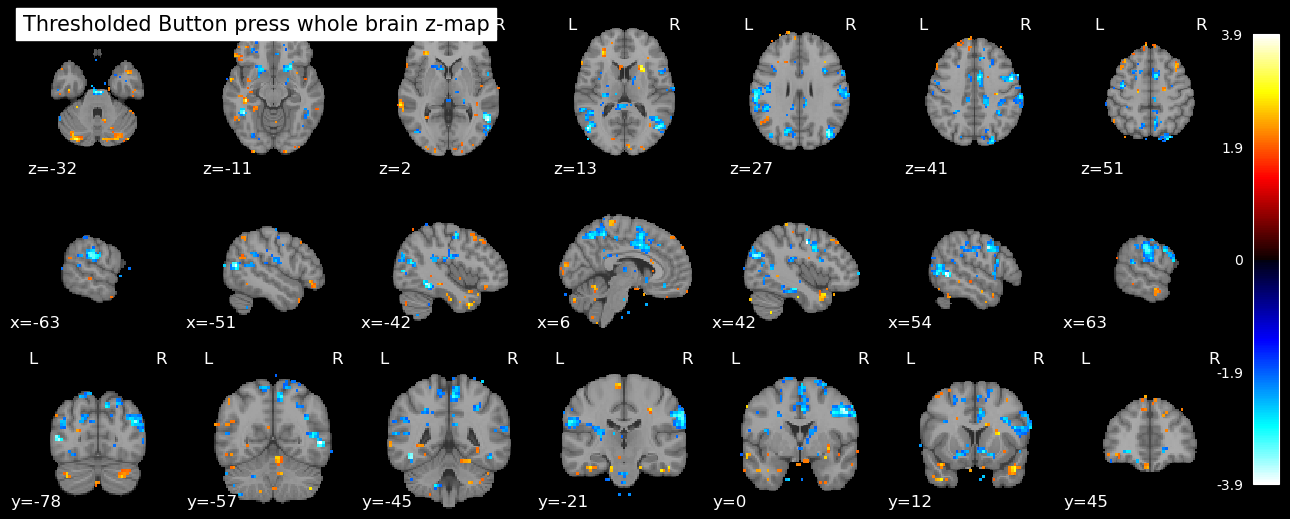

In [36]:
plot_stat_map(thresholded_zmap, black_bg=True, display_mode='mosaic', title='Thresholded Button press whole brain z-map')

# Second level - first stim presentation

In [12]:
betamaps_paths = [
    glob.glob(os.path.join(first_level_dir, f"sub-{sub_id}",f"run-{run}",f"beta_*_first_stim_presentation.nii.gz"))[0]
    for sub_id in sub_ids
]
betamaps_paths.sort()

betamaps_first_stim = [image.load_img(path) for path in betamaps_paths]

In [13]:
X_first_stim = pd.DataFrame([1] * len(betamaps_first_stim), columns=['Intercept'])

In [14]:
model2 = SecondLevelModel().fit(betamaps_first_stim, design_matrix=X_first_stim)

In [15]:
first_stim_map = model2.compute_contrast(output_type='z_score')

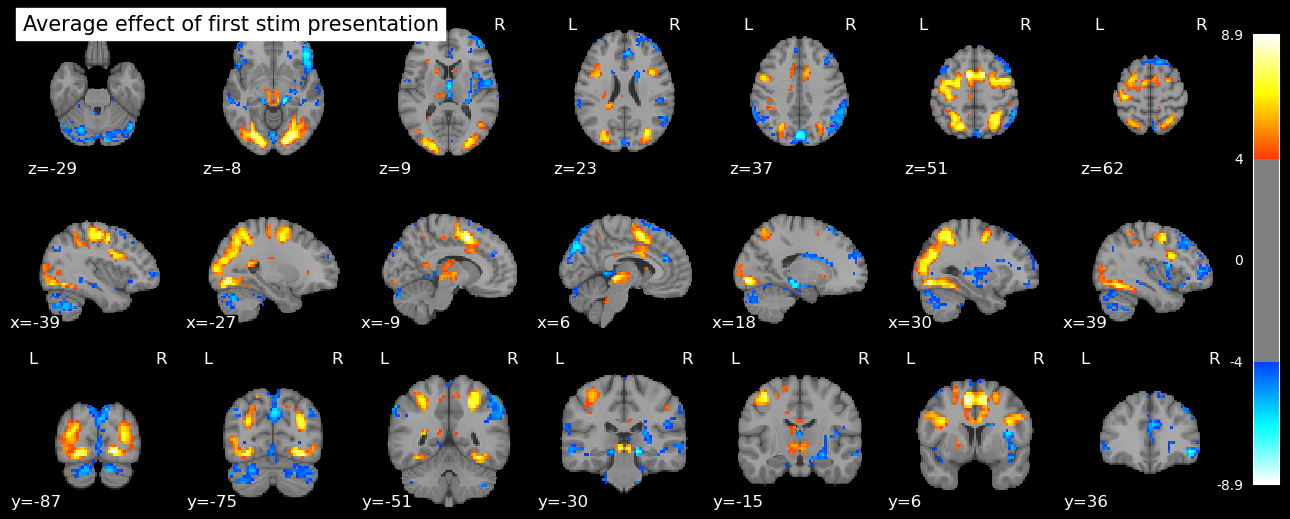

In [16]:
plot_stat_map(first_stim_map, threshold=4, black_bg=True, display_mode='mosaic', title='Average effect of first stim presentation')

In [17]:
thresholded_zmap, threshold = threshold_stats_img(first_stim_map, alpha=0.005, height_control='bonferroni')#, cluster_threshold=20)
print(f"Threshold: {threshold:.3f}")

Threshold: 5.386


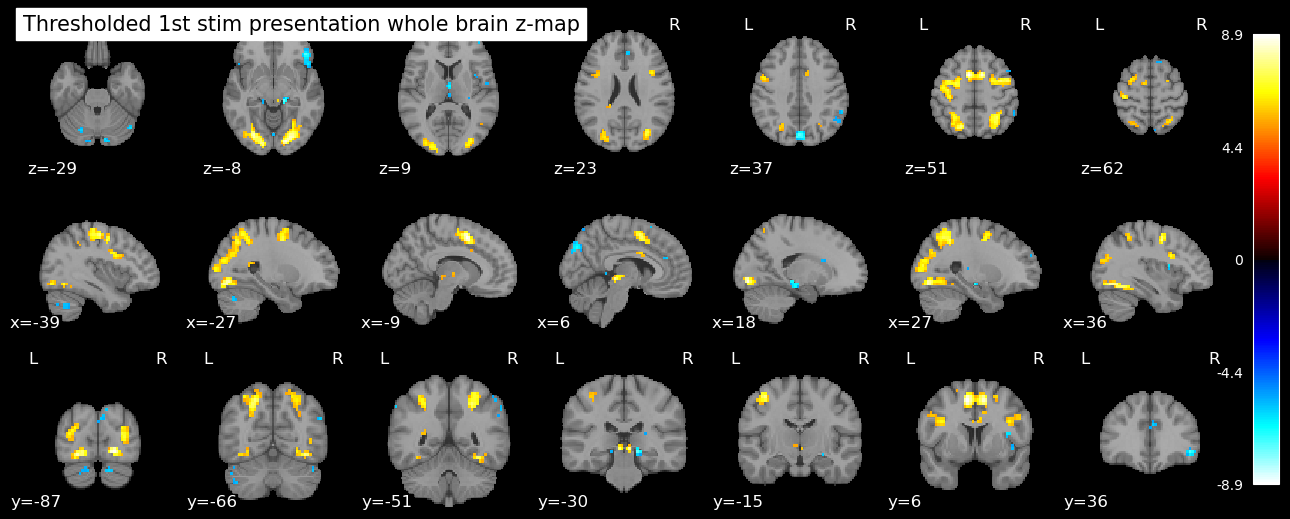

In [18]:
plot_stat_map(thresholded_zmap, black_bg=True, display_mode='mosaic', title='Thresholded 1st stim presentation whole brain z-map')